In [1]:
import numpy as np
import pandas as pd

# import library

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# ambil data set

In [3]:
dt = pd.read_csv("data.csv")

# menampilkan 5 data teratas

In [4]:
dt.head(5)

,Provinsi,2019_1,2018_1,2017_1,2019_2,2018_2,2017_2,2019_3,2018_3,2017_3,2019_4,2018_4,2017_4
0,ACEH,36577651,16821377,13924348,683594,3188727,195731,365383,354741,627698,12312,57072,3503.0
1,SUMATERAUTARA,140001466,174180412,183833290,28451314,22457559,24670540,1009301,982963,712106,512431,401949,441558.0
2,SUMATERABARAT,53627185,65436217,62235590,15775761,11235623,10157884,428103,401094,393481,284134,201097,181807.0
3,RIAU,97977865,83691805,86606102,678705,1956112,4528173,166306,163047,238190,12224,35010,81046.0
4,JAMBI,31708519,52604338,40844775,1260470,977763,960322,166667,159187,159546,22702,17500,17188.0


# menampilkan informasi data set

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provinsi  35 non-null     object 
 1   2019_1    35 non-null     int64  
 2   2018_1    35 non-null     int64  
 3   2017_1    35 non-null     int64  
 4   2019_2    35 non-null     int64  
 5   2018_2    35 non-null     int64  
 6   2017_2    35 non-null     int64  
 7   2019_3    35 non-null     int64  
 8   2018_3    35 non-null     int64  
 9   2017_3    35 non-null     int64  
 10  2019_4    35 non-null     int64  
 11  2018_4    35 non-null     int64  
 12  2017_4    33 non-null     float64
dtypes: float64(1), int64(11), object(1)
memory usage: 3.7+ KB


# menghapus variabel NaN (tidak mempunyai nilai)

In [6]:
dt.dropna()

,Provinsi,2019_1,2018_1,2017_1,2019_2,2018_2,2017_2,2019_3,2018_3,2017_3,2019_4,2018_4,2017_4
0,ACEH,36577651,16821377,13924348,683594,3188727,195731,365383,354741,627698,12312,57072,3503.0
1,SUMATERAUTARA,140001466,174180412,183833290,28451314,22457559,24670540,1009301,982963,712106,512431,401949,441558.0
2,SUMATERABARAT,53627185,65436217,62235590,15775761,11235623,10157884,428103,401094,393481,284134,201097,181807.0
3,RIAU,97977865,83691805,86606102,678705,1956112,4528173,166306,163047,238190,12224,35010,81046.0
4,JAMBI,31708519,52604338,40844775,1260470,977763,960322,166667,159187,159546,22702,17500,17188.0
5,SUMATERASELATAN,75763657,105342840,90910128,7595799,10027100,11099711,298062,294714,277085,136806,179466,198664.0
6,BENGKULU,7535836,6540103,5299262,601952,76051,49458,161316,157923,125483,10841,1361,885.0
7,LAMPUNG,85558337,80166716,86629377,7263647,6330158,3917254,819571,827217,674928,130824,113298,70111.0
8,KEP.BANGKABELITUNG,23265881,21562427,19130897,587410,324377,52078,14790,13760,12644,10579,5805,932.0
9,KEP.RIAU,23395884,19009466,17774468,776597,216116,1294260,26100,25464,19270,13987,3868,23164.0


# menampilkan banyaknya elemen 

In [7]:
dt.shape

(35, 13)

# Hapus kolom kolom yang tidak penting

In [8]:
da = dt.drop(['Provinsi'], axis = 1)
da.head()

,2019_1,2018_1,2017_1,2019_2,2018_2,2017_2,2019_3,2018_3,2017_3,2019_4,2018_4,2017_4
0,36577651,16821377,13924348,683594,3188727,195731,365383,354741,627698,12312,57072,3503.0
1,140001466,174180412,183833290,28451314,22457559,24670540,1009301,982963,712106,512431,401949,441558.0
2,53627185,65436217,62235590,15775761,11235623,10157884,428103,401094,393481,284134,201097,181807.0
3,97977865,83691805,86606102,678705,1956112,4528173,166306,163047,238190,12224,35010,81046.0
4,31708519,52604338,40844775,1260470,977763,960322,166667,159187,159546,22702,17500,17188.0


# recheck data NaN

In [9]:
da.dropna(how='any') 

,2019_1,2018_1,2017_1,2019_2,2018_2,2017_2,2019_3,2018_3,2017_3,2019_4,2018_4,2017_4
0,36577651,16821377,13924348,683594,3188727,195731,365383,354741,627698,12312,57072,3503.0
1,140001466,174180412,183833290,28451314,22457559,24670540,1009301,982963,712106,512431,401949,441558.0
2,53627185,65436217,62235590,15775761,11235623,10157884,428103,401094,393481,284134,201097,181807.0
3,97977865,83691805,86606102,678705,1956112,4528173,166306,163047,238190,12224,35010,81046.0
4,31708519,52604338,40844775,1260470,977763,960322,166667,159187,159546,22702,17500,17188.0
5,75763657,105342840,90910128,7595799,10027100,11099711,298062,294714,277085,136806,179466,198664.0
6,7535836,6540103,5299262,601952,76051,49458,161316,157923,125483,10841,1361,885.0
7,85558337,80166716,86629377,7263647,6330158,3917254,819571,827217,674928,130824,113298,70111.0
8,23265881,21562427,19130897,587410,324377,52078,14790,13760,12644,10579,5805,932.0
9,23395884,19009466,17774468,776597,216116,1294260,26100,25464,19270,13987,3868,23164.0


In [10]:
X = pd.DataFrame(da.dropna(how='any'))
X.tail()

,2019_1,2018_1,2017_1,2019_2,2018_2,2017_2,2019_3,2018_3,2017_3,2019_4,2018_4,2017_4
28,3175758,2670547,2315101,212047,345295,321190,243447,230435,227351,3819,6180,5748.0
30,682325,265961,198658,34379,299,1146,84330,80034,100087,619,5,20.0
32,721089,624490,5060799,456706,1395374,25397,51738,50991,67706,8225,24974,454.0
33,6433479,7793468,7050701,678158,8965,9739,112803,82309,117602,12214,160,174.0
34,3149382220,3137707479,2922636196,263918004,261932627,258843681,17118650,16432945,16429102,4753382,4688120,4632834.0


# Menggambarkan deskripsi data set

In [11]:
X.describe()

,2019_1,2018_1,2017_1,2019_2,2018_2,2017_2,2019_3,2018_3,2017_3,2019_4,2018_4,2017_4
count,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01
mean,1.908030e+08,1.899546e+08,1.770840e+08,1.599488e+07,1.587470e+07,1.568536e+07,1.032792e+06,9.912772e+05,9.901380e+05,2.880806e+05,2.841281e+05,2.807392e+05
std,5.602314e+08,5.546832e+08,5.144314e+08,4.756602e+07,4.676953e+07,4.675396e+07,3.018109e+06,2.901449e+06,2.893093e+06,8.567036e+05,8.370901e+05,8.368114e+05
min,6.823250e+05,2.659610e+05,9.738200e+04,3.370500e+04,2.990000e+02,0.000000e+00,2.352000e+03,1.840000e+03,1.730000e+03,6.070000e+02,5.000000e+00,0.000000e+00
25%,9.156076e+06,8.047874e+06,7.942814e+06,6.019520e+05,4.098250e+05,7.332700e+04,1.128030e+05,8.230900e+04,1.176020e+05,1.084100e+04,7.335000e+03,1.312000e+03
50%,3.726774e+07,2.712751e+07,2.956458e+07,1.851460e+06,1.614939e+06,1.294260e+06,2.434470e+05,2.304350e+05,2.381900e+05,3.334600e+04,2.890400e+04,2.316400e+04
75%,8.540422e+07,1.015322e+08,9.091013e+07,1.034436e+07,8.669087e+06,8.952188e+06,6.071310e+05,5.605460e+05,6.276980e+05,1.863100e+05,1.551600e+05,1.602270e+05
max,3.149382e+09,3.137707e+09,2.922636e+09,2.639180e+08,2.619326e+08,2.588437e+08,1.711865e+07,1.643294e+07,1.642910e+07,4.753382e+06,4.688120e+06,4.632834e+06


# untuk melihat ekor data gunakan fungsi tail()

In [12]:
X.tail()

,2019_1,2018_1,2017_1,2019_2,2018_2,2017_2,2019_3,2018_3,2017_3,2019_4,2018_4,2017_4
28,3175758,2670547,2315101,212047,345295,321190,243447,230435,227351,3819,6180,5748.0
30,682325,265961,198658,34379,299,1146,84330,80034,100087,619,5,20.0
32,721089,624490,5060799,456706,1395374,25397,51738,50991,67706,8225,24974,454.0
33,6433479,7793468,7050701,678158,8965,9739,112803,82309,117602,12214,160,174.0
34,3149382220,3137707479,2922636196,263918004,261932627,258843681,17118650,16432945,16429102,4753382,4688120,4632834.0


# proses menebak jumlah cluster

In [13]:
scr=[]
for i in range (1, 34):
    score = KMeans(n_clusters=i).fit(X).score(X)
    print(score)
    scr.append(score)

-2.8570760686414864e+19
-2.622009402606039e+18
-4.0545263813832416e+17
-2.4025884170796042e+17
-1.1382814948411077e+17
-4.100392799537627e+16
-2.4935729614372796e+16
-1.5891030480859342e+16
-8684777791097333.0
-4292140159978980.5
-2984020653601363.5
-2216704009781389.2
-1654657094518202.8
-1238399060530555.5
-992782718932673.0
-850649321894924.0
-651138003818221.9
-509192944008515.3
-368151878327846.7
-294650638128613.5
-223202666122539.53
-164620322374493.22
-114587931153499.72
-90023435956593.69
-73216276474805.7
-54305350104240.336
-38839506376429.0
-23292202727826.0
-16690718991982.5
-12945479882534.0
-7071804116969.0
-3241150355597.0
-0.0


# menghambil nilai yang ada ditengah-tengah lekukan cluster

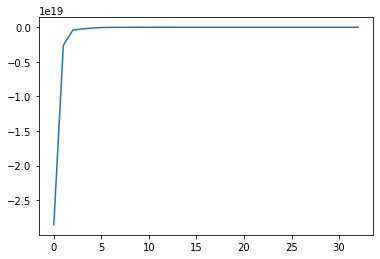

In [14]:
plt.plot(scr)

# mengubah variabel menjadi array

In [15]:
x_array = np.array(X)
print(x_array)

[[3.65776510e+07 1.68213770e+07 1.39243480e+07 6.83594000e+05
  3.18872700e+06 1.95731000e+05 3.65383000e+05 3.54741000e+05
  6.27698000e+05 1.23120000e+04 5.70720000e+04 3.50300000e+03]
 [1.40001466e+08 1.74180412e+08 1.83833290e+08 2.84513140e+07
  2.24575590e+07 2.46705400e+07 1.00930100e+06 9.82963000e+05
  7.12106000e+05 5.12431000e+05 4.01949000e+05 4.41558000e+05]
 [5.36271850e+07 6.54362170e+07 6.22355900e+07 1.57757610e+07
  1.12356230e+07 1.01578840e+07 4.28103000e+05 4.01094000e+05
  3.93481000e+05 2.84134000e+05 2.01097000e+05 1.81807000e+05]
 [9.79778650e+07 8.36918050e+07 8.66061020e+07 6.78705000e+05
  1.95611200e+06 4.52817300e+06 1.66306000e+05 1.63047000e+05
  2.38190000e+05 1.22240000e+04 3.50100000e+04 8.10460000e+04]
 [3.17085190e+07 5.26043380e+07 4.08447750e+07 1.26047000e+06
  9.77763000e+05 9.60322000e+05 1.66667000e+05 1.59187000e+05
  1.59546000e+05 2.27020000e+04 1.75000000e+04 1.71880000e+04]
 [7.57636570e+07 1.05342840e+08 9.09101280e+07 7.59579900e+06
  1

# proses scaling data array

In [16]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[1.14000467e-02, 5.27672497e-03, 4.73114880e-03, 2.46278010e-03,
        1.21727166e-02, 7.56174535e-04, 2.12096681e-02, 2.14776182e-02,
        3.81051820e-02, 2.46277175e-03, 1.21726963e-02, 7.56124653e-04],
       [4.42465607e-02, 5.54319340e-02, 6.28685946e-02, 1.07689655e-01,
        8.57368778e-02, 9.53105747e-02, 5.88298358e-02, 5.97113219e-02,
        4.32434354e-02, 1.07689508e-01, 8.57368047e-02, 9.53105594e-02],
       [1.68148321e-02, 2.07717835e-02, 2.12617221e-02, 5.96551445e-02,
        4.28939951e-02, 3.92433146e-02, 2.48740119e-02, 2.42986701e-02,
        2.38474541e-02, 5.96550436e-02, 4.28939990e-02, 3.92431501e-02],
       [3.09002265e-02, 2.65904061e-02, 2.96005376e-02, 2.44425304e-03,
        7.46686373e-03, 1.74938518e-02, 9.57882365e-03, 9.81108696e-03,
        1.43942683e-02, 2.44425625e-03, 7.46675370e-03, 1.74938278e-02],
       [9.85365231e-03, 1.66818654e-02, 1.39424643e-02, 4.64887454e-03,
        3.73174250e-03, 3.71004614e-03, 9.59991465e-03, 9.57

# Tentukan jumlah cluster-nya, misalnya di sini ada 5 cluster
# Gunakan fungsi library K-Means pada Python

In [17]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

# Cari nilai pusat/centroid dari masing masing cluster

In [18]:
print(kmeans.cluster_centers_)

[[2.17766116e+07 2.08146296e+07 1.94956698e+07 1.91704510e+06
  1.66745895e+06 1.17365167e+06 2.65959381e+05 2.46979286e+05
  2.65130333e+05 3.45270952e+04 2.98441429e+04 2.10058095e+04]
 [3.14938222e+09 3.13770748e+09 2.92263620e+09 2.63918004e+08
  2.61932627e+08 2.58843681e+08 1.71186500e+07 1.64329450e+07
  1.64291020e+07 4.75338200e+06 4.68812000e+06 4.63283400e+06]
 [7.99084155e+08 7.58673864e+08 6.27422064e+08 2.44912310e+07
  4.48570220e+07 3.87401760e+07 4.12121000e+05 4.05803000e+05
  4.05334000e+05 4.41107000e+05 8.02859000e+05 6.93379000e+05]
 [5.29473532e+08 4.71206615e+08 4.46712574e+08 5.91900570e+07
  5.32683000e+07 5.78272405e+07 3.25928900e+06 3.19488450e+06
  3.11119100e+06 1.06606150e+06 9.53405500e+05 1.03500250e+06]
 [1.03971986e+08 1.24074944e+08 1.23859806e+08 1.00979755e+07
  9.44029588e+06 9.96648450e+06 5.55957000e+05 5.37133375e+05
  5.06249750e+05 1.81872375e+05 1.68963625e+05 1.78381500e+05]]


# Tampilkan hasil clustering dan tambahkan kolom clustering ke dalam dataframe

In [24]:
print(kmeans.labels_)
    
# Menambahkan kolom "cluster" dalam dataframe
X["cluster"] = kmeans.labels_
X.head(34)

[0 4 0 4 0 4 0 4 0 0 0 2 3 0 3 4 4 0 0 0 0 4 0 0 0 0 4 0 0 0 0 0 1]


,2019_1,2018_1,2017_1,2019_2,2018_2,2017_2,2019_3,2018_3,2017_3,2019_4,2018_4,2017_4,cluster
0,36577651,16821377,13924348,683594,3188727,195731,365383,354741,627698,12312,57072,3503.0,0
1,140001466,174180412,183833290,28451314,22457559,24670540,1009301,982963,712106,512431,401949,441558.0,4
2,53627185,65436217,62235590,15775761,11235623,10157884,428103,401094,393481,284134,201097,181807.0,0
3,97977865,83691805,86606102,678705,1956112,4528173,166306,163047,238190,12224,35010,81046.0,4
4,31708519,52604338,40844775,1260470,977763,960322,166667,159187,159546,22702,17500,17188.0,0
5,75763657,105342840,90910128,7595799,10027100,11099711,298062,294714,277085,136806,179466,198664.0,4
6,7535836,6540103,5299262,601952,76051,49458,161316,157923,125483,10841,1361,885.0,0
7,85558337,80166716,86629377,7263647,6330158,3917254,819571,827217,674928,130824,113298,70111.0,4
8,23265881,21562427,19130897,587410,324377,52078,14790,13760,12644,10579,5805,932.0,0
9,23395884,19009466,17774468,776597,216116,1294260,26100,25464,19270,13987,3868,23164.0,0


# Coba lakukan visualisasi pembagian hasil cluster

(array([21.,  0.,  1.,  0.,  0.,  1.,  0.,  2.,  0.,  8.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

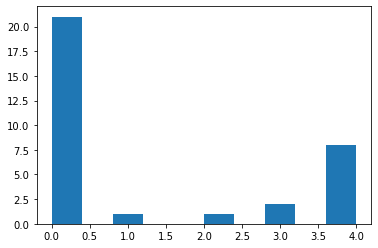

In [20]:
plt.hist(X["cluster"])

# Lakukan visualisasi pengelompokan cluster. Untuk melakukannya, bisa digunakan fungsi seaborn pada Python dan maka hasilnya akan seperti di bawah ini.

<Figure size 432x288 with 0 Axes>

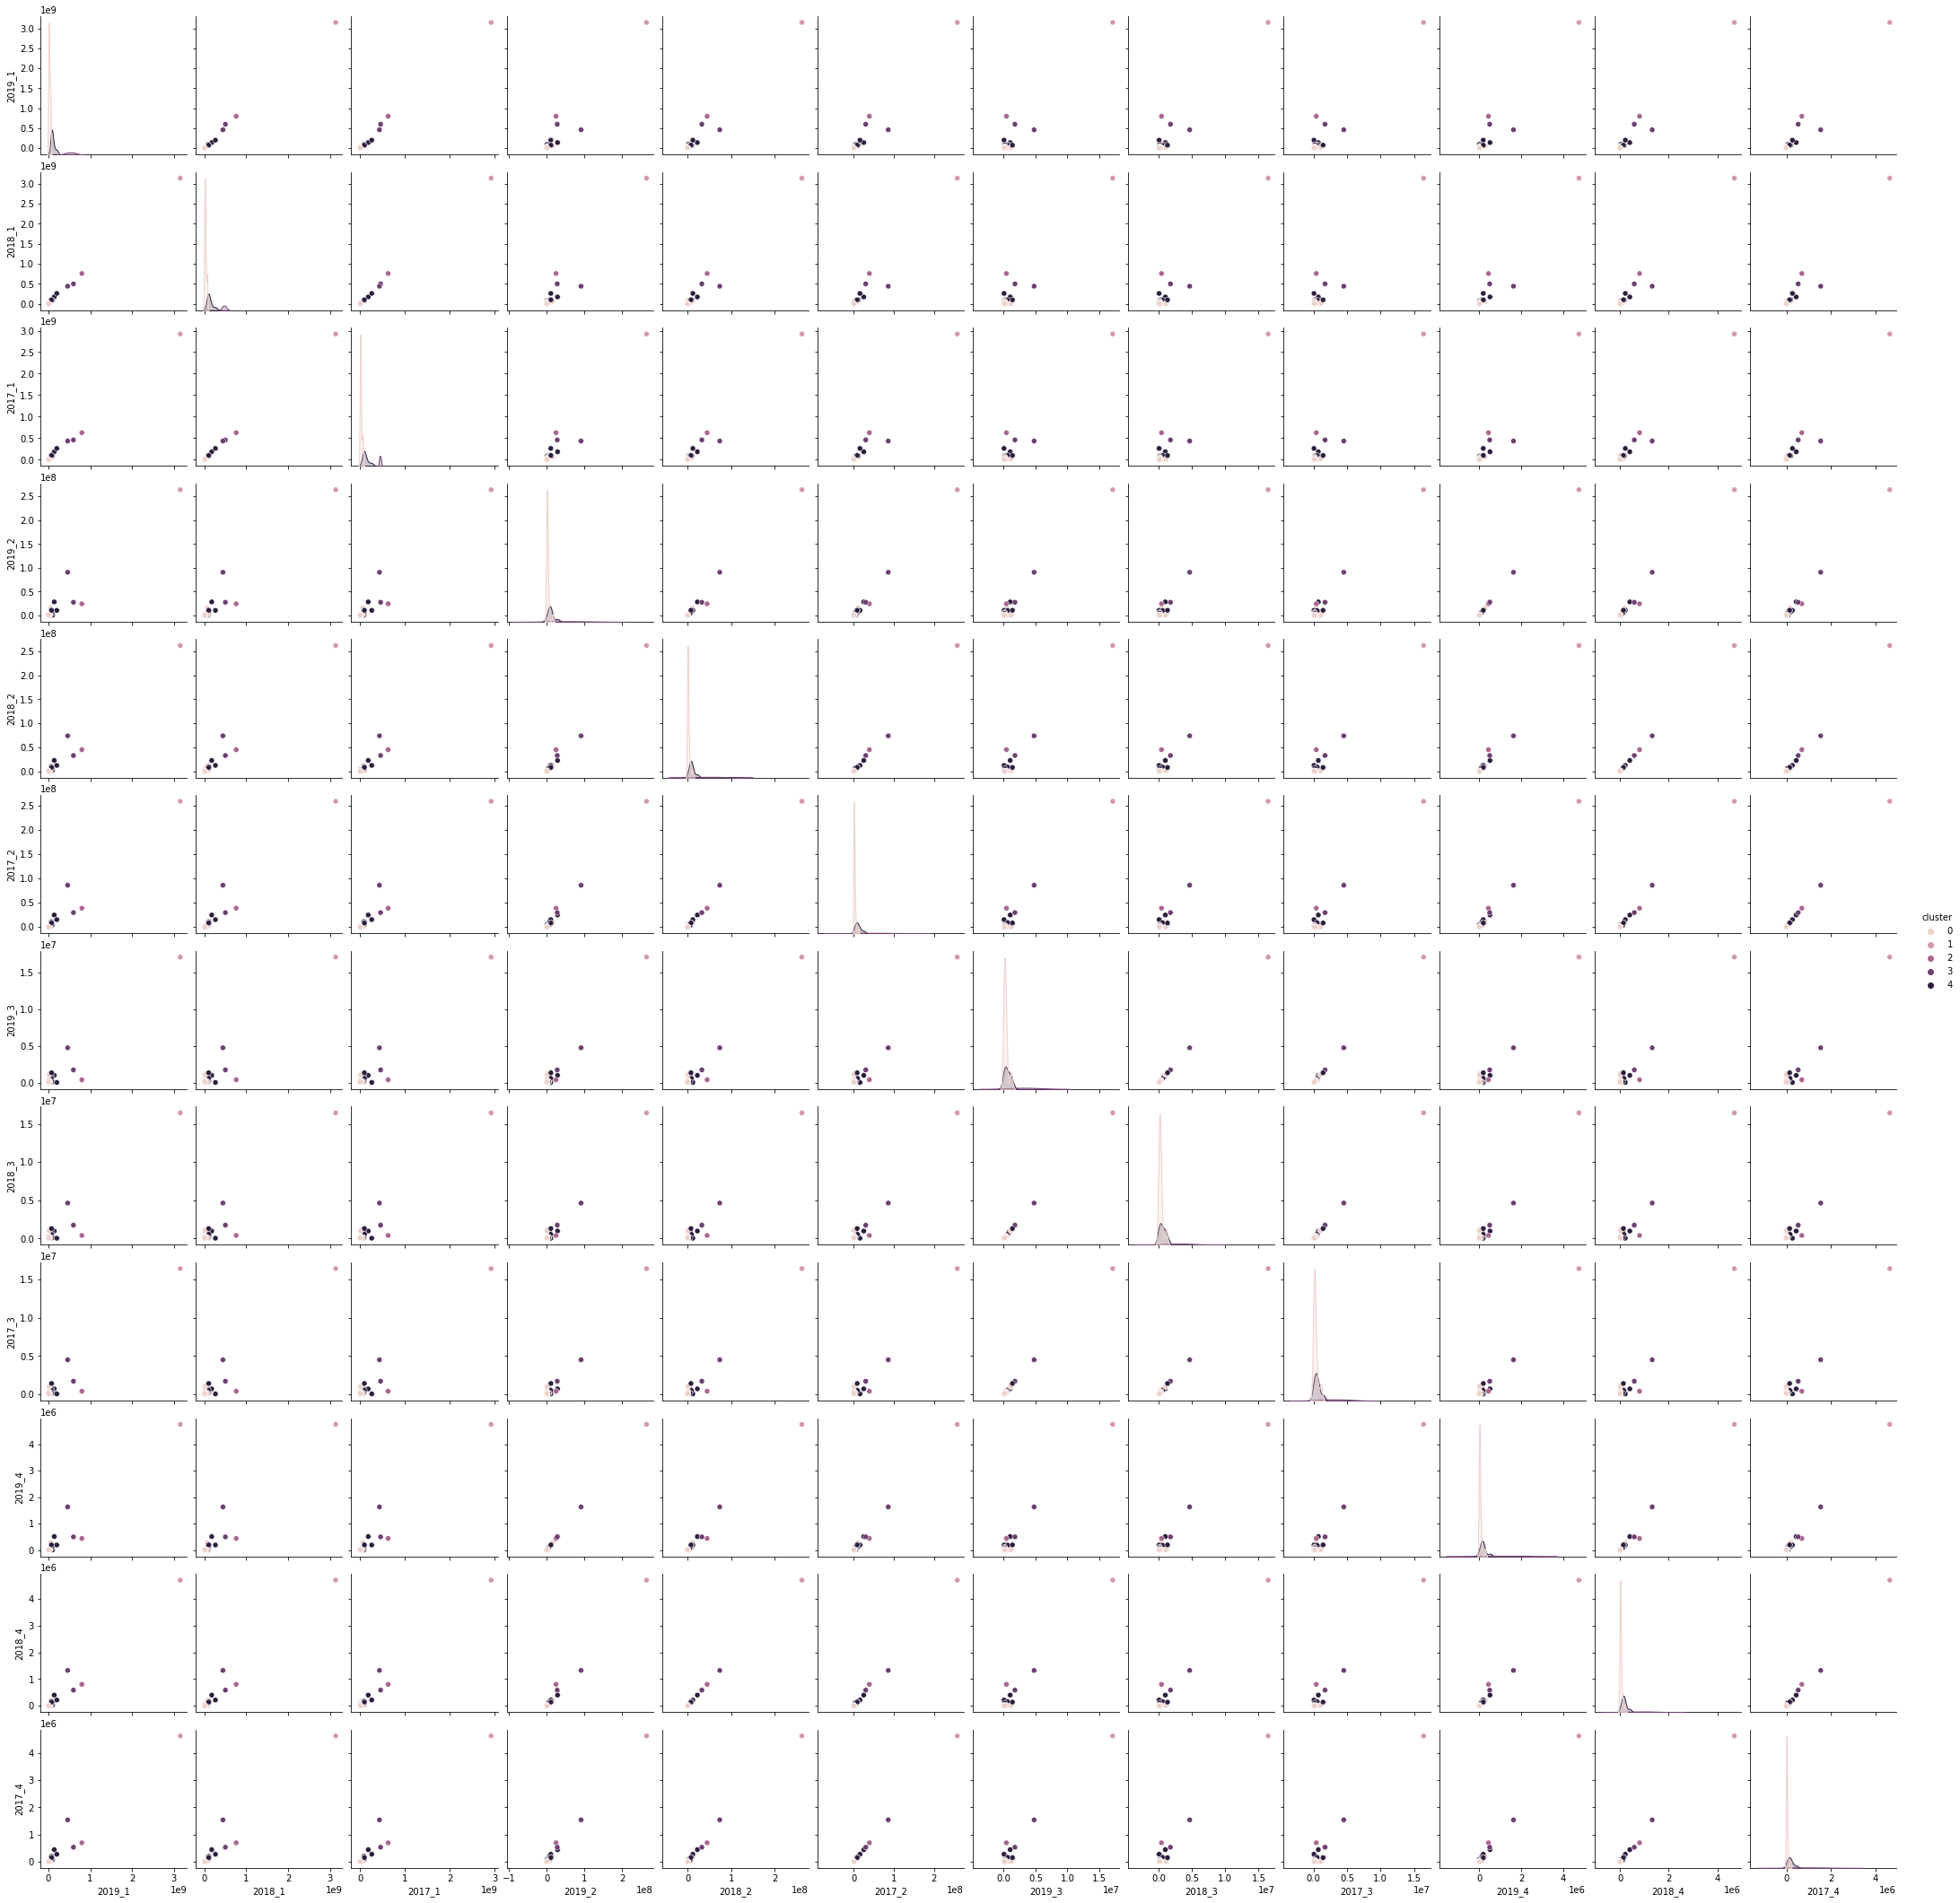

In [22]:
plt.figure()
sns.pairplot(X, hue="cluster", dropna=True)
plt.show()

# Dari gambar di atas, maka dapat kita lihat bahwa dari data populasi ayam pedaging, petelur, sapi potong dan produksi telur, 2017-2019 telah dicluster menjadi 5